# Mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Download and install requirements

In [2]:
!cp -r gdrive/MyDrive/NLP/image_search_data ./

In [22]:
!pip install transformers
!pip install -q kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = "REPLACE_WITH_YOUR_KAGGLE_USERNAME"
os.environ['KAGGLE_KEY'] = "REPLACE_WITH_YOUR_KAGGLE_KEY"

!kaggle datasets download -d sajjadayobi360/flickrfa
!unzip flickrfa.zip

In [5]:
# Clone git repository (https://github.com/NLP-Final-Projects/image-search)

In [4]:
import os
import pandas as pd
import gdown
from sklearn.model_selection import train_test_split
from transformers import CLIPModel, CLIPConfig, CLIPVisionModel
from transformers import AutoModel, AutoTokenizer
from src.inference.demo import ImageSearchDemo
from os import listdir
from os.path import isfile, join

# Load and process dataset

In [24]:
df = pd.read_csv('/content/dataset.csv')
df.image = df.image.apply(lambda x: '/content/images/'+os.path.basename(x))
df.dropna().to_csv('dataset.csv', index=False)

# Load pretrained model

In [9]:
vision_encoder = CLIPVisionModel.from_pretrained('arman-aminian/farsi-image-search-vision')
text_encoder = AutoModel.from_pretrained('arman-aminian/farsi-image-search-text')

In [10]:
text_tokenizer = AutoTokenizer.from_pretrained('arman-aminian/farsi-image-search-text')

In [28]:
search = ImageSearchDemo(vision_encoder, text_encoder, text_tokenizer, device='cuda')

In [29]:
train, test = train_test_split(df, test_size=0.25)

In [30]:
search.compute_image_embeddings(test.image.to_list())

computing image embeddings: 100%|██████████| 254/254 [01:16<00:00,  3.33it/s]


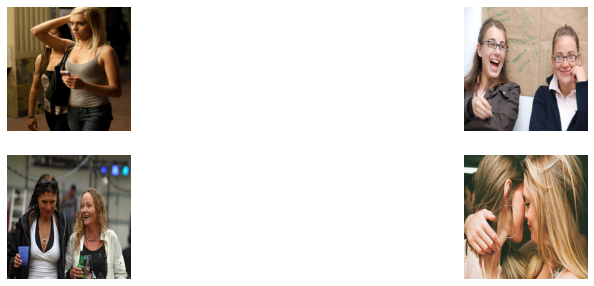

In [31]:
search.image_search('دو زن')

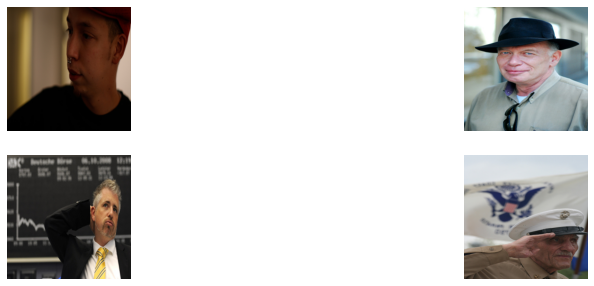

In [32]:
search.image_search('یک مرد')

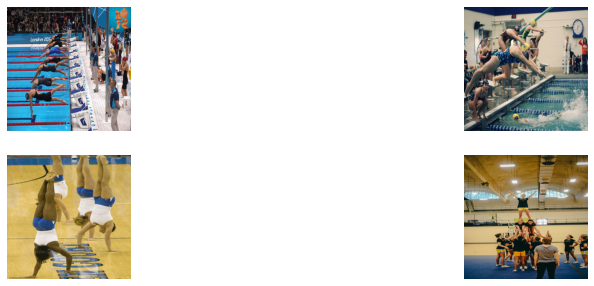

In [33]:
search.image_search('ورزش کردن گروهی')

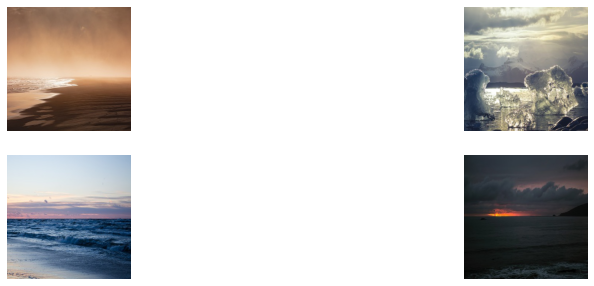

In [34]:
search.image_search('خورشید و دریا')

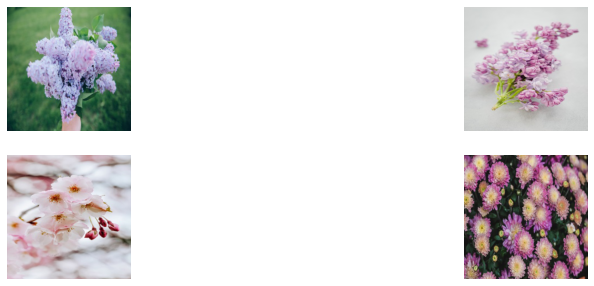

In [38]:
search.image_search('گل صورتی')

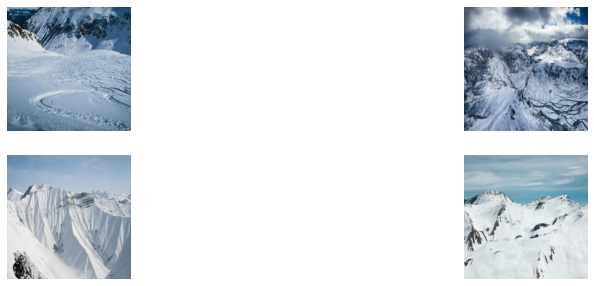

In [43]:
search.image_search('کوه برفی')

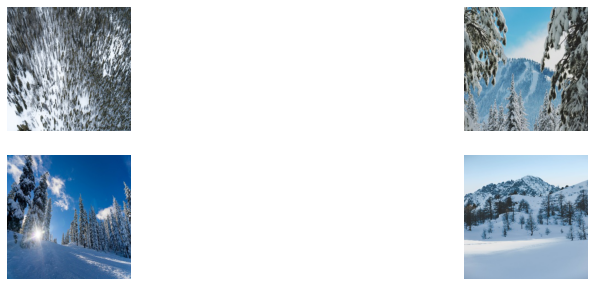

In [44]:
search.image_search('درخت برفی')